# D209 Task 2 Performance Assessment

## Predictive Analysis

### WGU

### Ryan Russon

### Student ID: 010337779

### 01/24/2024


## Part 1: Research Question


### A1: Research Question


- Can we accurately predict the initial hospital stay of a patient using decision tree machine learning?

    - Decision Trees: Decision trees are highly interpretable and can capture non-linear trends within data.
    
    - The specific decision tree methodology used is the gradient boost method. Gradient boost uses decision trees for base learning and has improved accuracy at a small cost to interpretability.
    

### A2: Objectives and Goals of Analysis


- This analysis aims to provide insights into readmission rates and reduction of readmission rates within a hospital setting. By understanding these relationships, healthcare providers can improve patient care, manage resources more efficiently, and improve patient outcomes.


## Part 2: Method Justification


### B1: Gradient Boost Analysis and Outcomes


#### Analysis
    
    - Base Learner: Decision Trees
    
    - Ensemble Technique
    
    - Each tree is trained to correct the previous trees' errors. This strategy improves the model's accuracy iteratively. It can focus on complex, non-linear relationships among multiple different features.
    
#### Expected Outcomes

    - Accurate prediction of the length of hospital stay for a patient.
    
    - Insight into factors that most significantly impact the initial hospital stay of a patient.
    
#### How A Decision Tree Works

    - Decision trees for regression work by dividing the input into regions, making predictions based on these. Decision trees start each tree with a node for an 'If-Else' statement. Each node has two children nodes, these nodes either create a prediction or add another 'If-Else' node. The node with predictions will have no children and are called leaf nodes. This creates a tree-like structure of decisions, with leaf nodes representing data segments with similar target values. In the leaf nodes, the prediction is typically the mean of the target values. The tree can capture non-linear relationships between features and the target.


### B2: Assumptions


#### Ordinal Relation between Encoded Features and Non-Parametric

    - One beneficial assumption of the Gradient Boosting model is that it is non-parametric. It essentially doesn't assume a specific form for the relationship between data.
    
    - Another assumption that the gradient boost method makes is that encoded features have an ordinal relationship. For example, if 0 = IV, 1 = CT, and 2 = MRI, this model will assume that MRI is somehow 'greater' than CT or IV, and vice versa.
    
    - Solution: 
    
        - The first solution is to use one-hot encoding for all features with more than 2 categories.
    
        - The second solution is using ordinal encoding only on ordinal categorical data.
        
        - The third solution is to use something other than broad label encoding for categorical features.


### B3: Programming Language and Libraries

- Python is an excellent choice for data cleaning and analysis due to its simplicity and the powerful data manipulation capabilities offered by libraries like Pandas and NumPy.

    - Simplicity: 
        Python's basic syntax naturally makes it highly readable and understandable. Developers can write and maintain code efficiently with Python.
    - Supportive Libraries:
        Pandas is ideal for data manipulation and cleaning. It allows easy handling of missing data, data filtering, and aggregation, essential for preparing the dataset for regression analysis.
        - NumPy: Useful for numerical computations, which can be important when transforming data for regression analysis.
        Scikit-learn: This library allows you to implement regression models, split data, and evaluate model performance metrics.
        - Matplotlib and Seaborn: These libraries are essential for visualizing data. They will help understand the distribution of data, visualize model results, and identify important features.


## Part 3: Data Preparation


### C1: Data Preparation Goal


- Goals and Steps:

    - Remove Duplicate Data: No duplicate data was found in the dataset, avoiding redundancy.
    
    - Handle Missing Values: No missing values were found in the dataset, ensuring completeness of data.
    
    - Identify and Treat Outliers: For example, in the 'TotalCharge' column, we identified outliers using the Interquartile Range (IQR) method. Action should have been taken on these outliers in this step, as further analysis is needed to determine if they are genuine extremes or errors.
    
    - Ensure Correct Data Types: Each column's data type was verified. In later steps, adjustments to data types will be based on the specific analysis requirements. Numerical non-categorical columns and all categorical columns were identified.
    
    - Proper Encoding:  All categorical features used in the analysis are correctly encoded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import (SelectKBest, f_regression)
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv('C:/Users/Ryan/OneDrive/Desktop/WGU_Study/D209/Data Sets and Dictionaries/medical_clean.csv')
df.info()
df.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

False

### C2: Initial Data Set and Variable Grouping

In [2]:
all_cols = df.columns
print('The following is a list of all variable names used in this analysis: \n\n', all_cols, '\n')

num_cols = df.select_dtypes(include=['number']).columns
bad_cols = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
num_cols = num_cols.difference(bad_cols)
print('The following is a list of all numerical variable names used in this analysis: \n\n', num_cols, '\n')

cat_cols = all_cols.difference(num_cols)
bad_cols_2 = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Job', 'CaseOrder', 'Lat', 'Lng', 'Zip', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'TimeZone']
cat_cols = cat_cols.difference(bad_cols_2)
print('The following is a list of all categorical variable names used in this analysis: \n\n', cat_cols, '\n')


The following is a list of all variable names used in this analysis: 

 Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object') 

The following is a list of all numerical variable names used in this analysis: 

 Index(['Additional_charges', 'Age', 'Children', 'Doc_visits',
       'Full_meals_eaten', 'Income', 'Initial_days', 'Population',
       'TotalCh

### C3: Data Preparation for Analysis

#### Univariate

In [3]:
df[num_cols].describe()

,Additional_charges,Age,Children,Doc_visits,Full_meals_eaten,Income,Initial_days,Population,TotalCharge,VitD_levels,vitD_supp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12934.528587,53.511700,2.097200,5.012200,1.001400,40490.495160,34.455299,9965.253800,5312.172769,17.964262,0.398900
std,6542.601544,20.638538,2.163659,1.045734,1.008117,28521.153293,26.309341,14824.758614,2180.393838,2.017231,0.628505
min,3125.703000,18.000000,0.000000,1.000000,0.000000,154.080000,1.001981,0.000000,1938.312067,9.806483,0.000000
25%,7986.487755,36.000000,0.000000,4.000000,0.000000,19598.775000,7.896215,694.750000,3179.374015,16.626439,0.000000
50%,11573.977735,53.000000,1.000000,5.000000,1.000000,33768.420000,35.836244,2769.000000,5213.952000,17.951122,0.000000
75%,15626.490000,71.000000,3.000000,6.000000,2.000000,54296.402500,61.161020,13945.000000,7459.699750,19.347963,1.000000
max,30566.070000,89.000000,10.000000,9.000000,7.000000,207249.100000,71.981490,122814.000000,9180.728000,26.394449,5.000000


- Discussion of Summary Statistics

    - count: The number of non-null entries.
    - mean: The average value.
    - std (standard deviation): Measures the data's variation or dispersion.
    - min: The minimum value.
    - 25% (1st quartile): The median of the first half of the data.
    - 50% (median): The middle value when the data is sorted.
    - 75% (3rd quartile): The median of the second half of the data.
    - max: The maximum value.
    
- The above summary statistics were only performed on numerical and non-categorical columns. Only those columns were included in these summary statistics.

- Below are the summary statistics for non-numeric columns:

In [4]:
for column in cat_cols:
    print(df[column].value_counts())

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64
No     6785
Yes    3215
Name: Anxiety, dtype: int64
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64
No     6426
Yes    3574
Name: Arthritis, dtype: int64
No     7107
Yes    2893
Name: Asthma, dtype: int64
No     5886
Yes    4114
Name: BackPain, dtype: int64
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64
No     7262
Yes    2738
Name: Diabetes, dtype: int64
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64
No     5910
Yes    4090
Name: HighBlood, dtype: int64
No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64
Yes    7094
No     2906
Name: Overweight, dtype: int64
No   

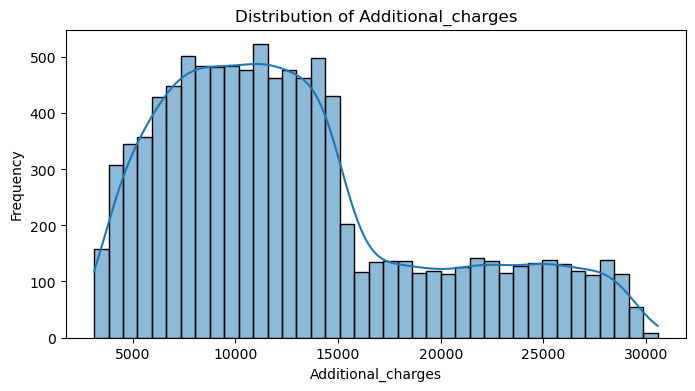

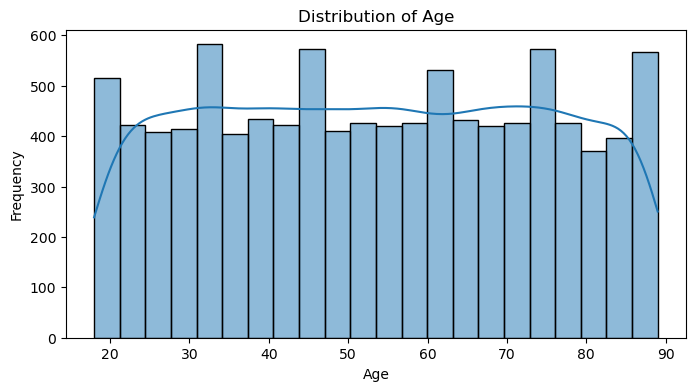

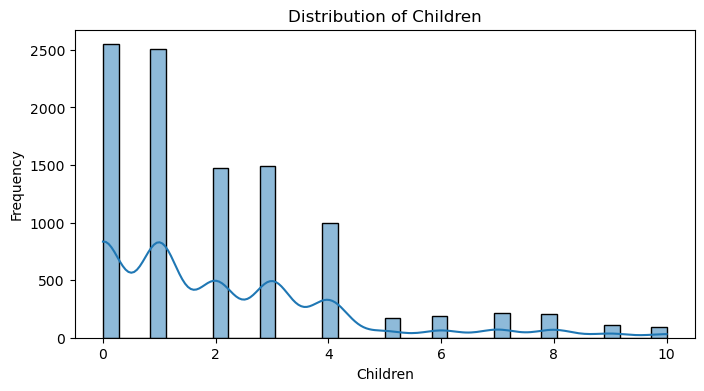

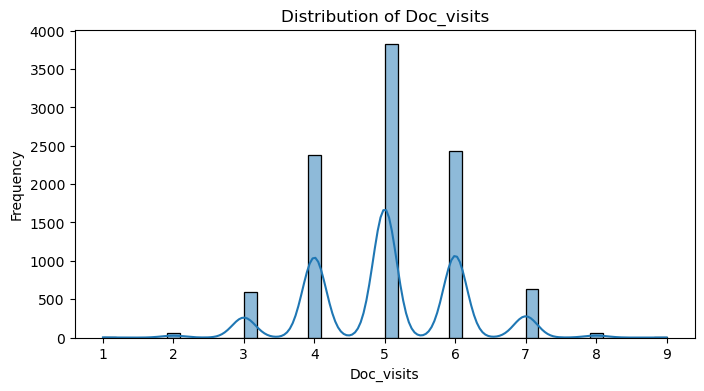

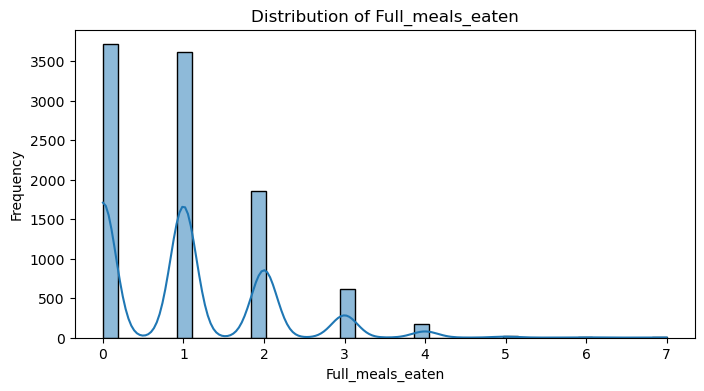

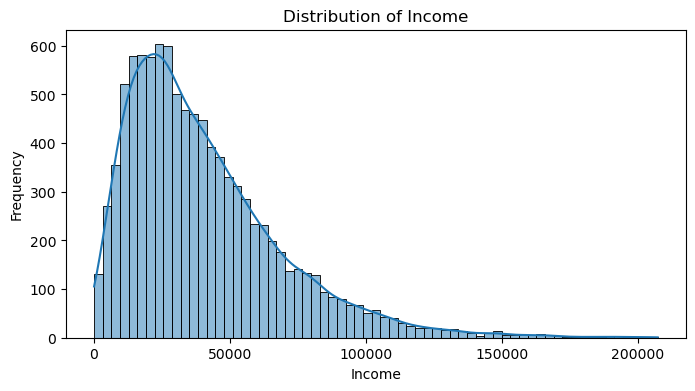

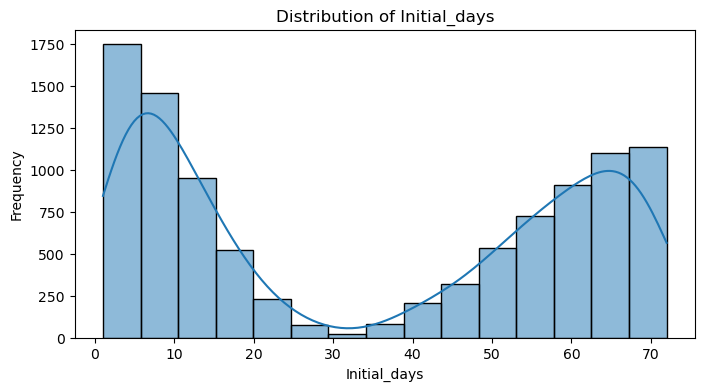

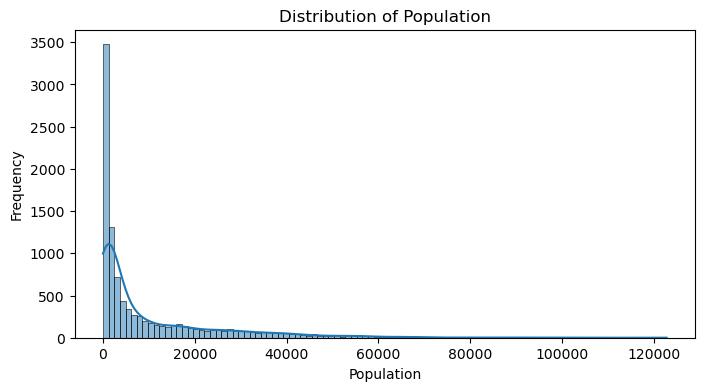

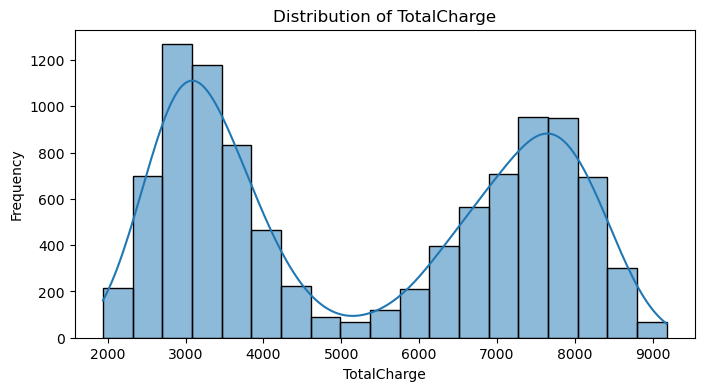

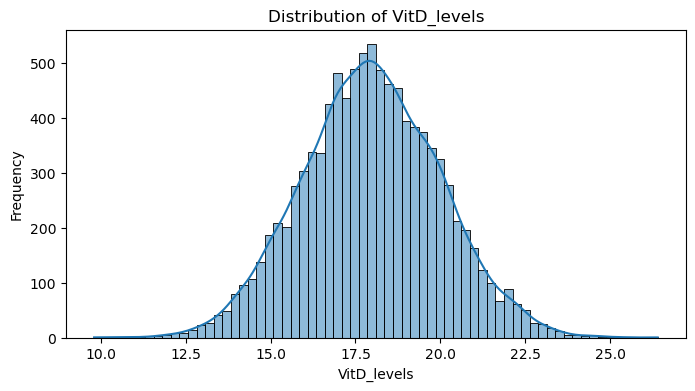

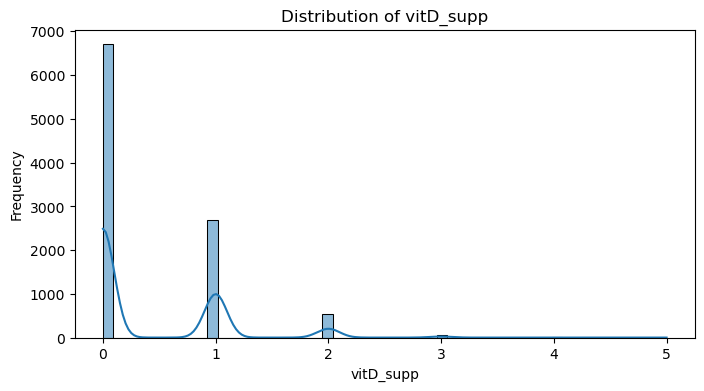

In [5]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Bivariate

##### Continuous to Continuous Pairs

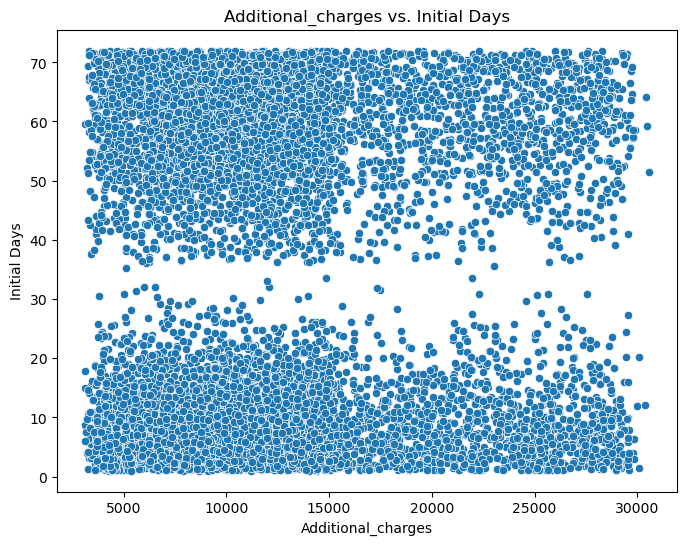

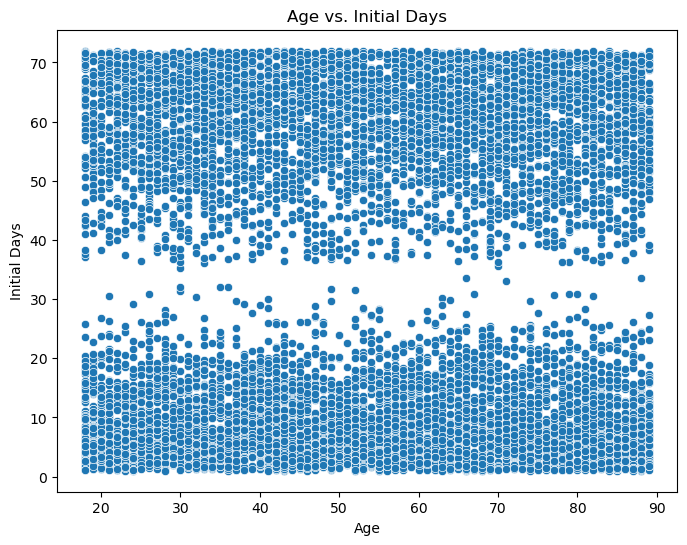

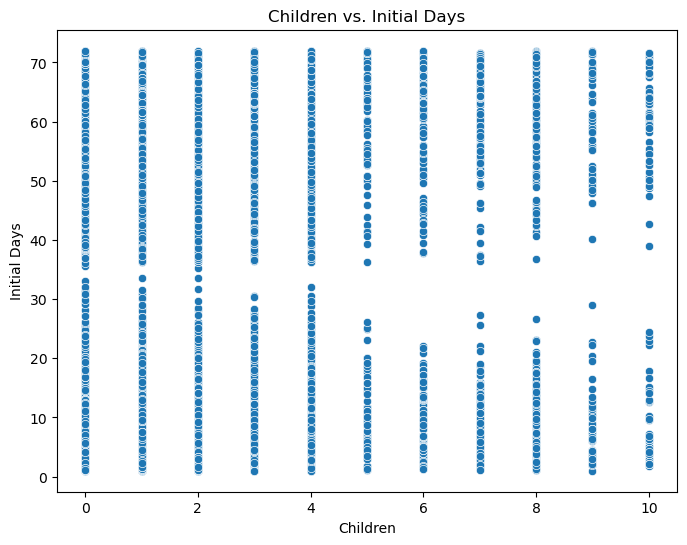

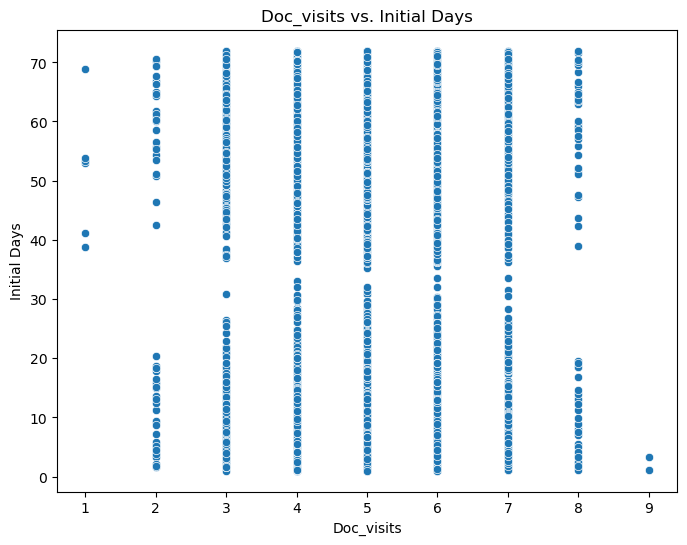

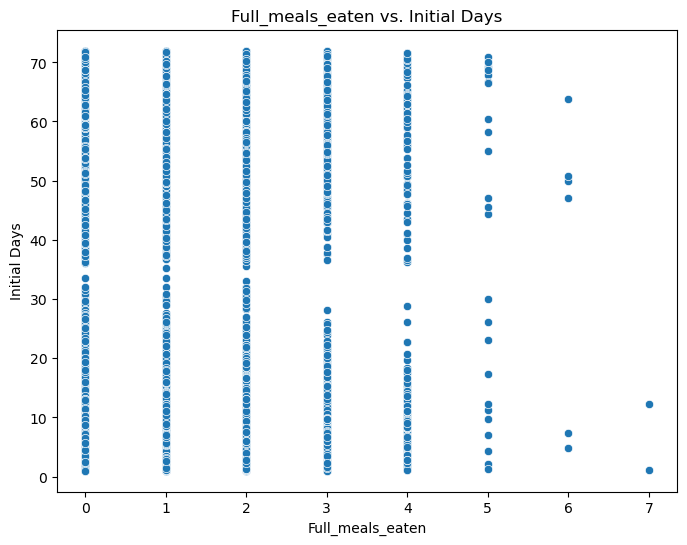

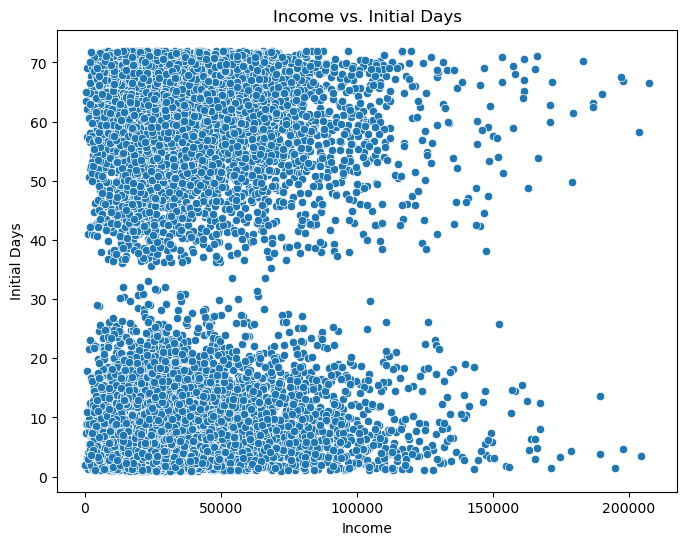

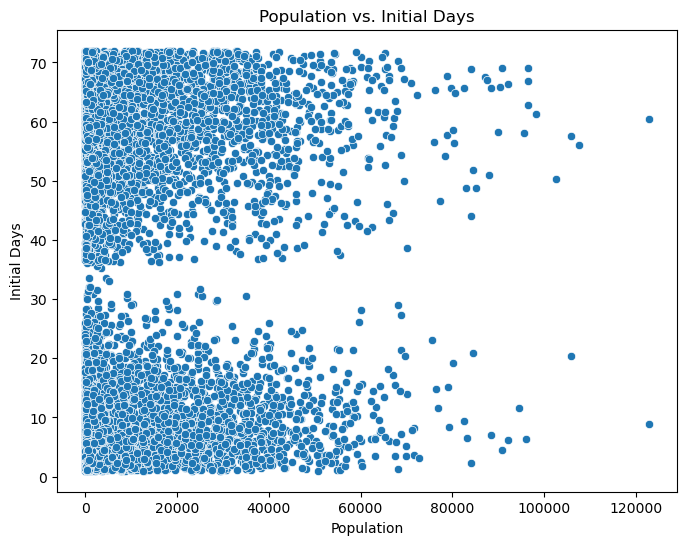

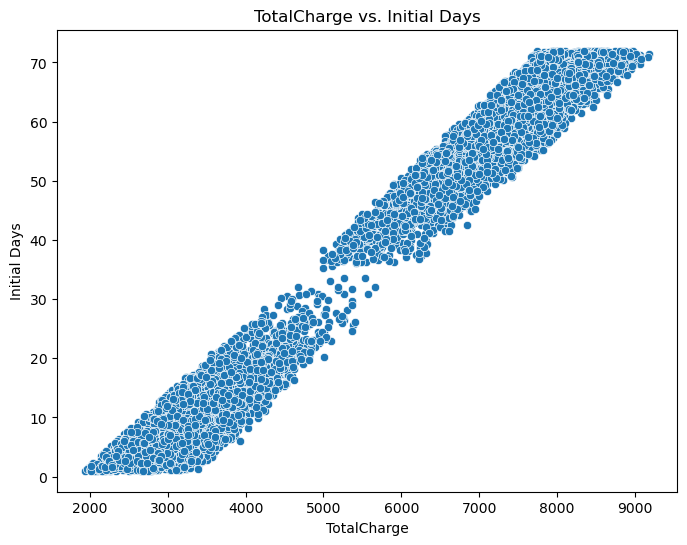

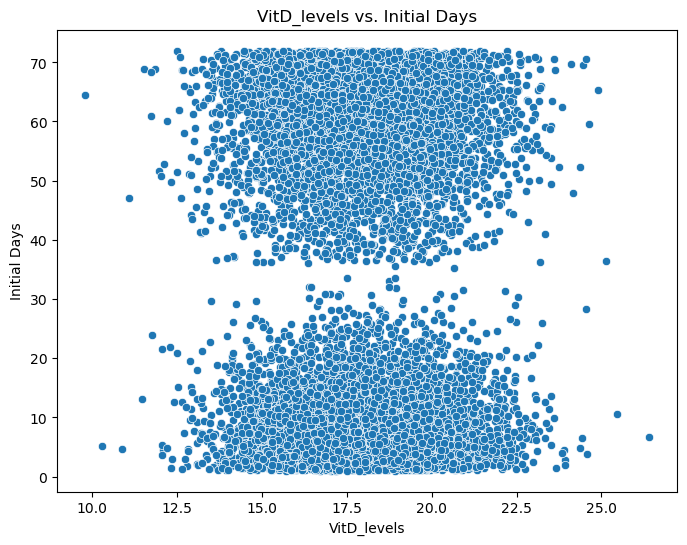

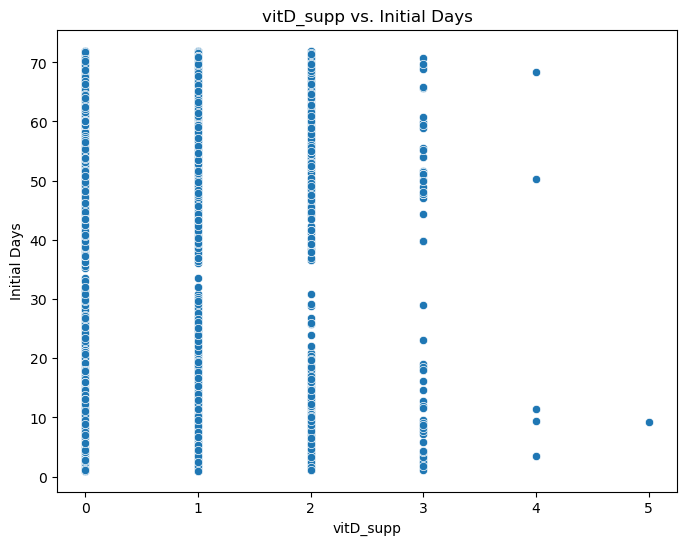

In [6]:
for col in num_cols:
    if col == 'Initial_days':
        continue;
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['Initial_days'])
    plt.title(f'{col} vs. Initial Days')
    plt.xlabel(col)
    plt.ylabel('Initial Days')
    plt.show()

##### Categorical to Continuous Pairs

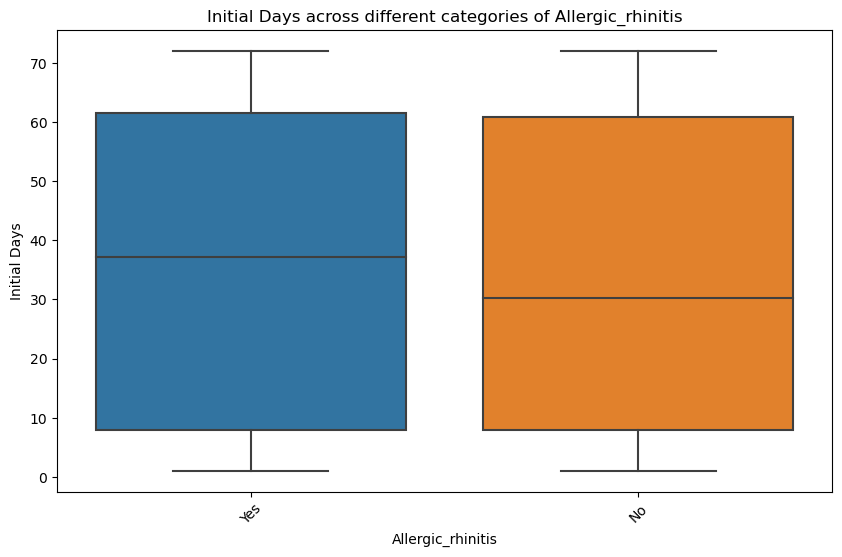

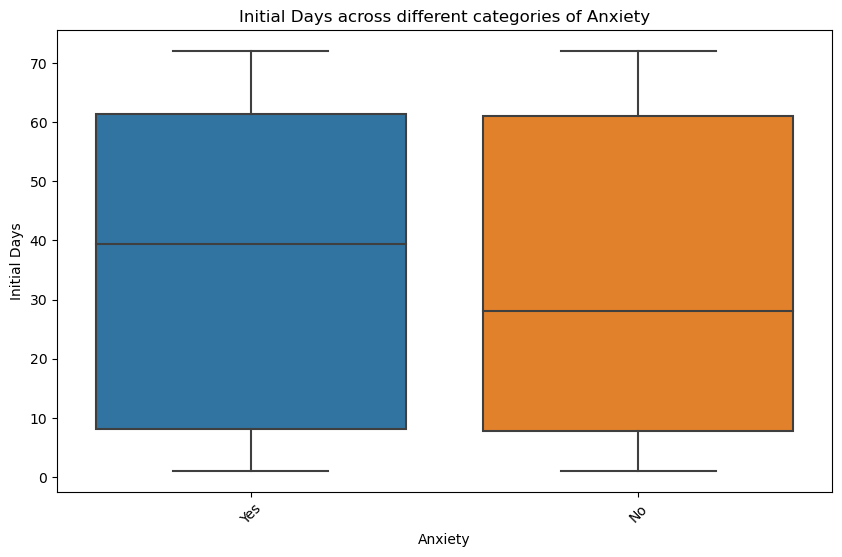

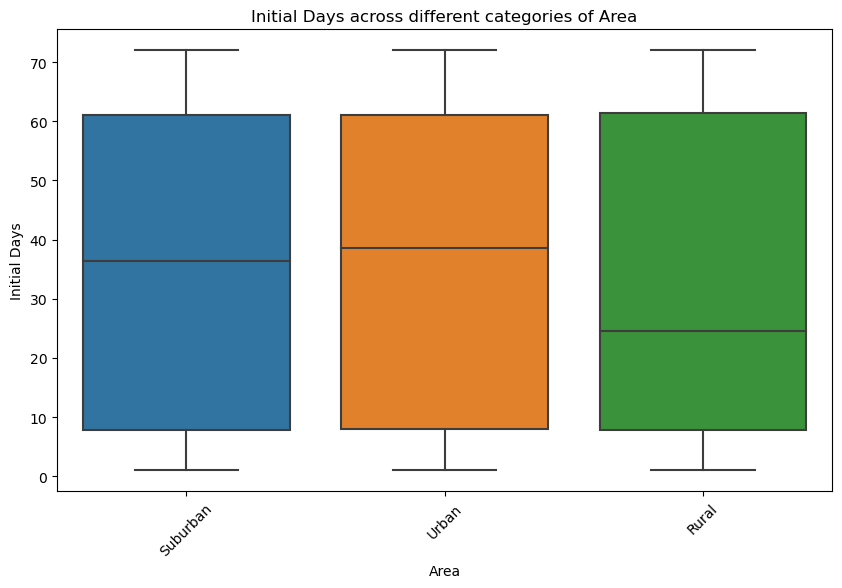

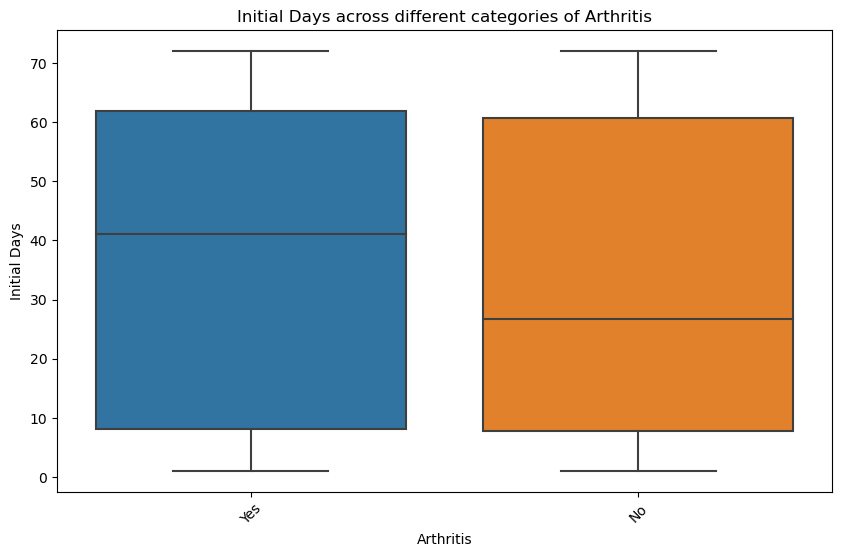

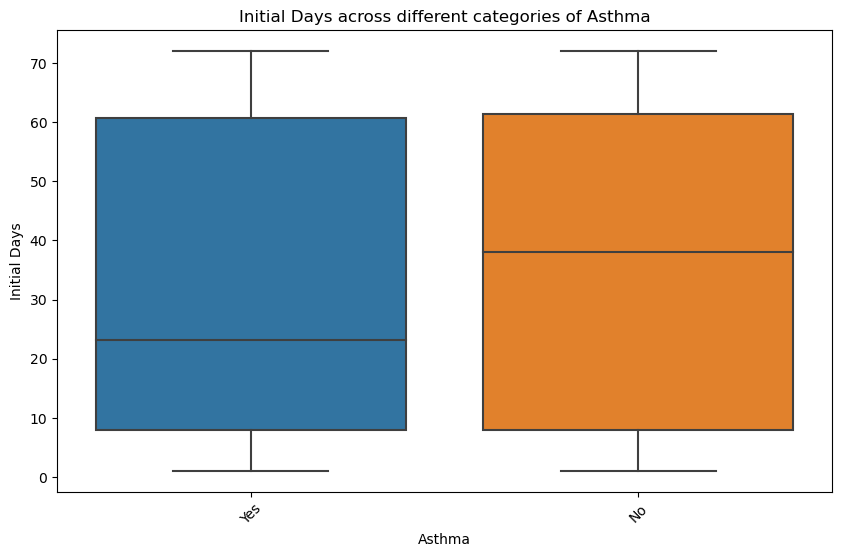

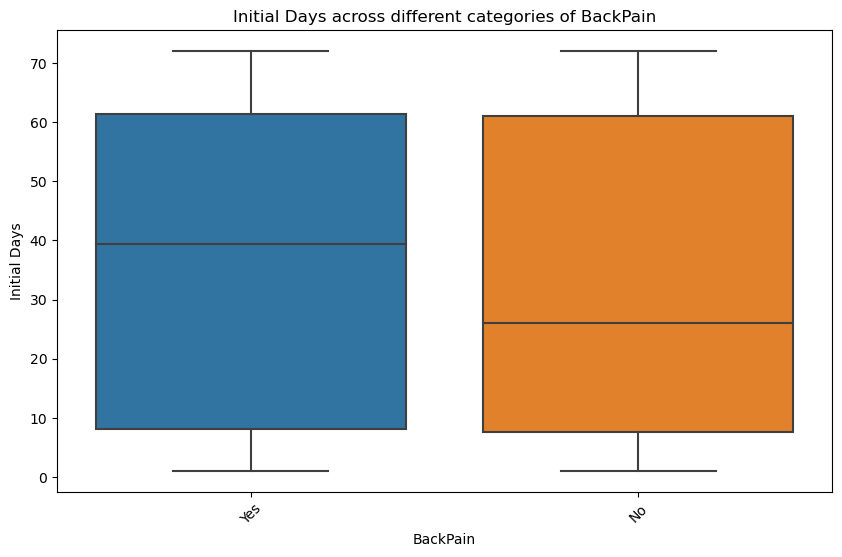

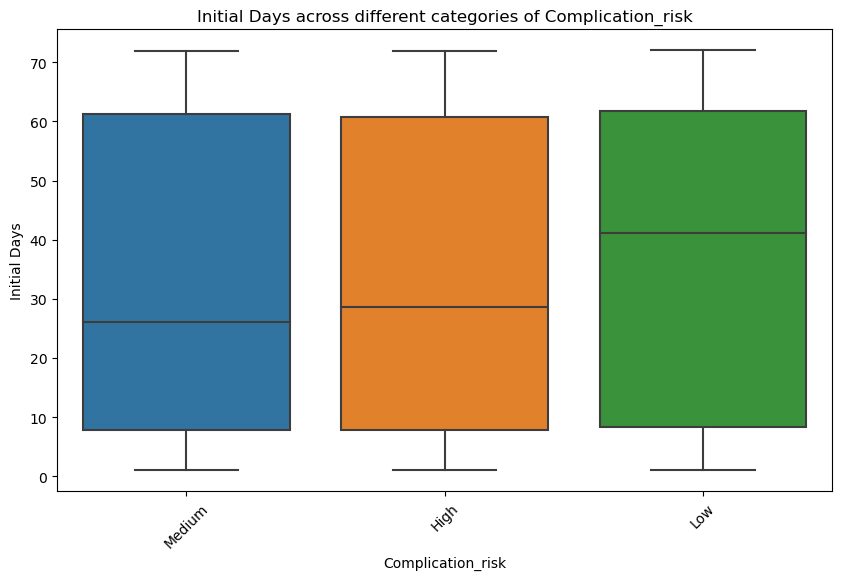

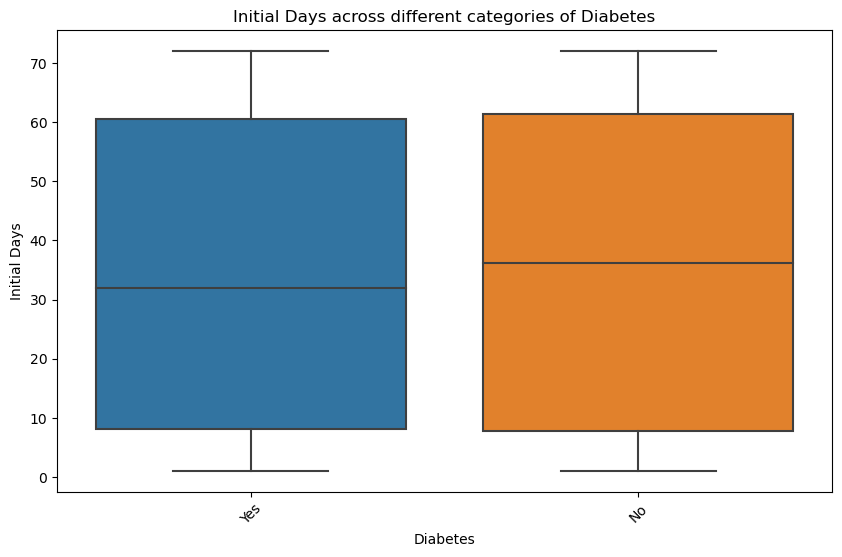

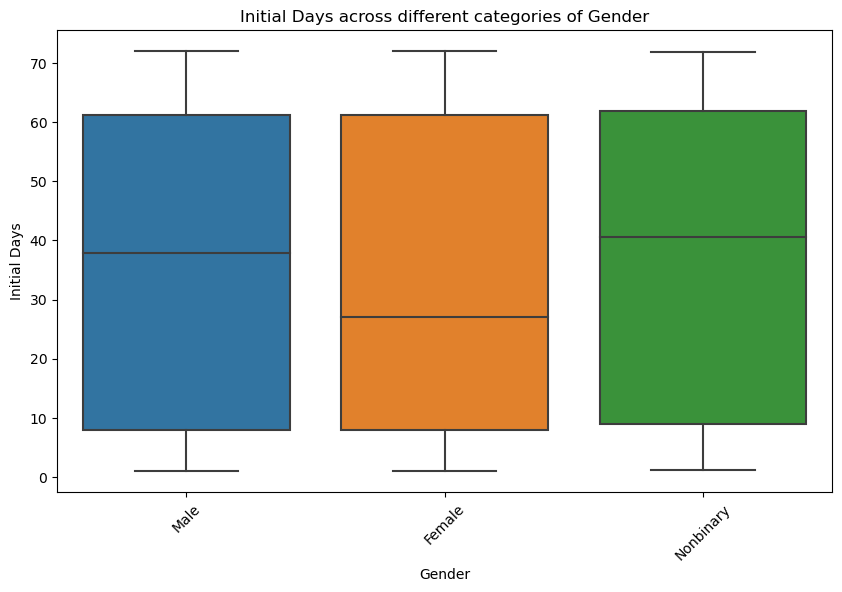

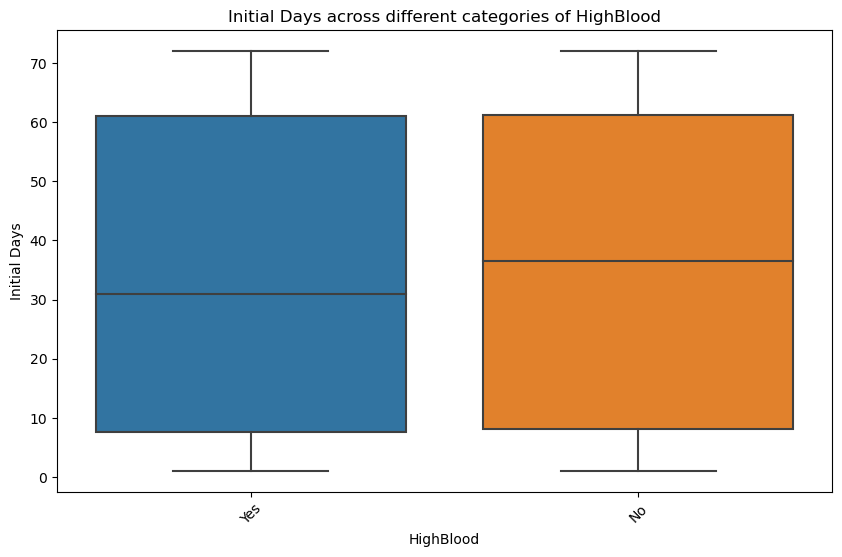

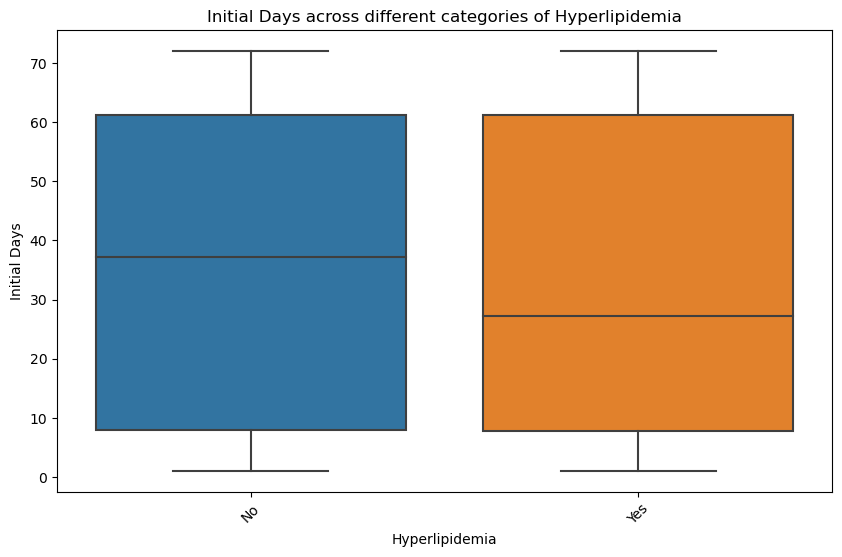

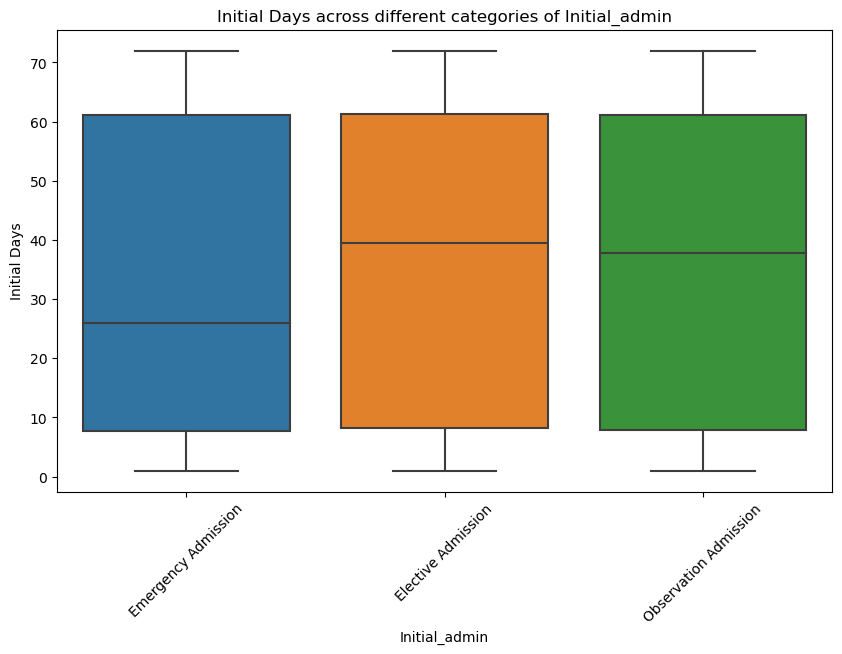

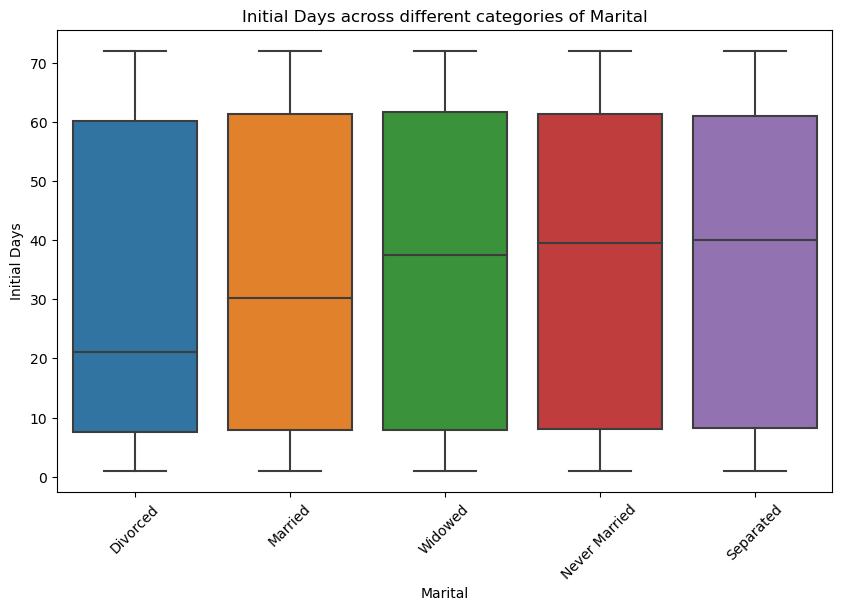

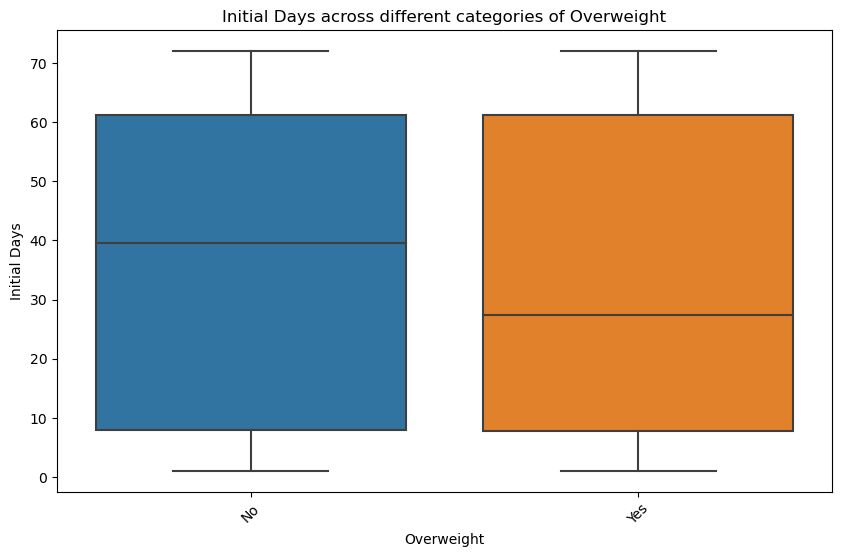

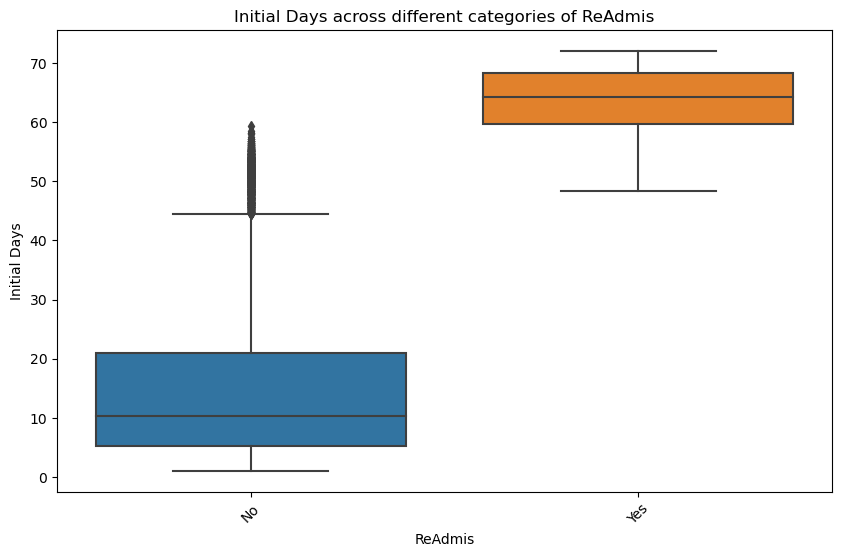

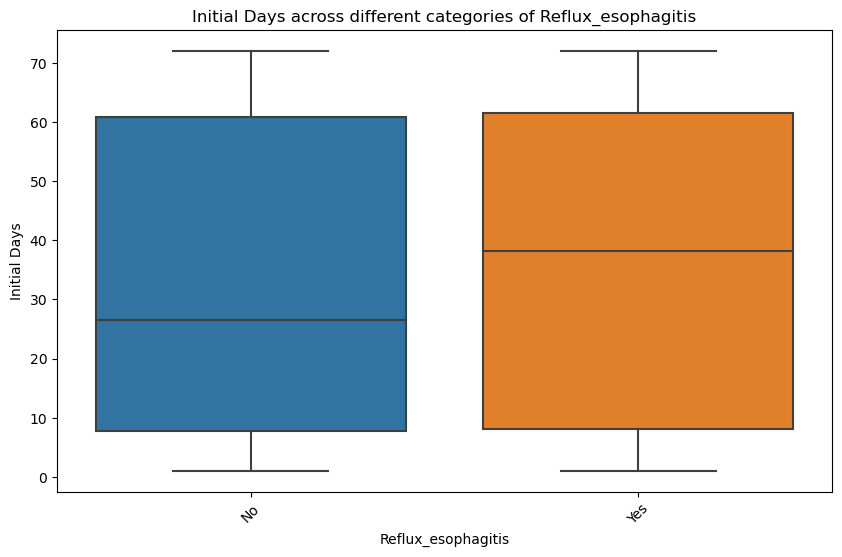

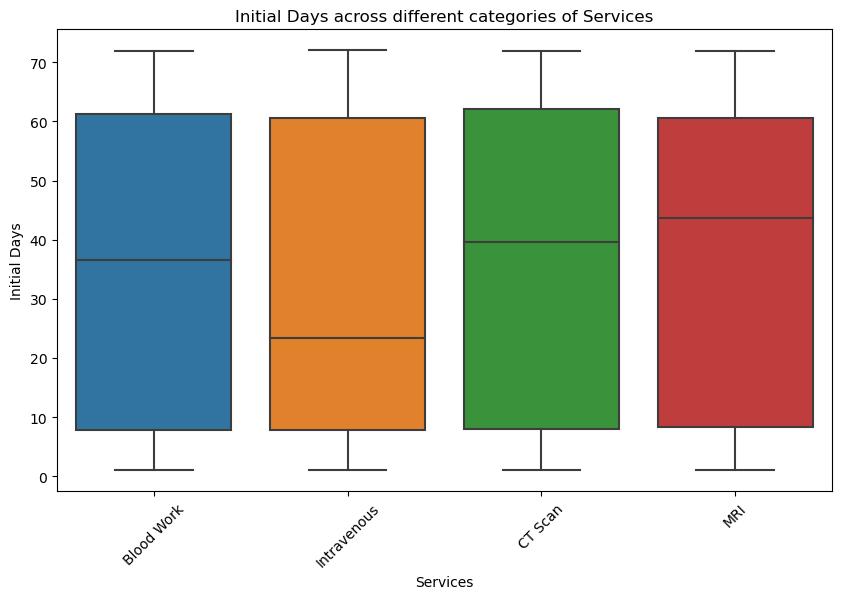

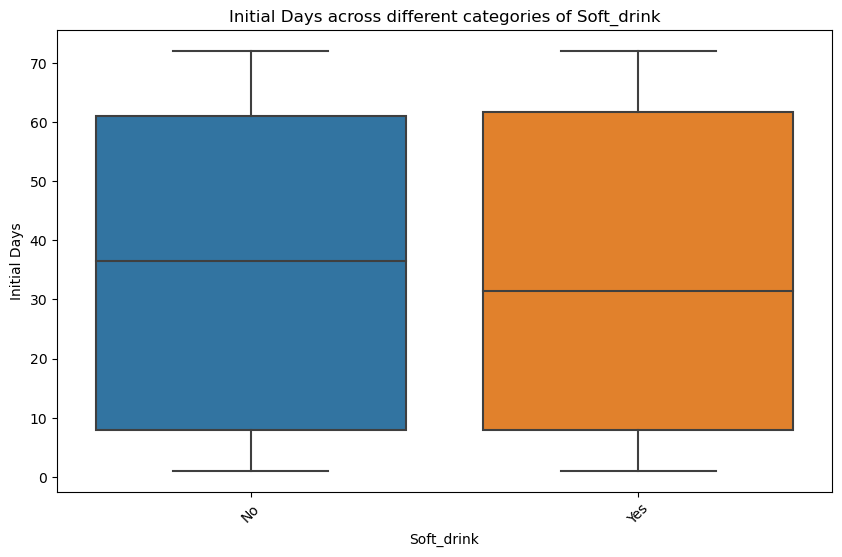

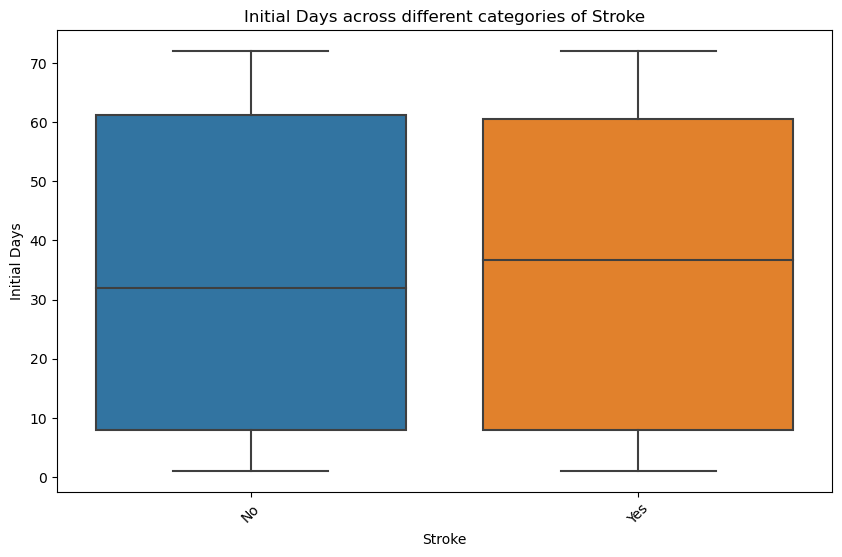

In [7]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Initial_days', data=df)
    plt.title(f'Initial Days across different categories of {col}')
    plt.xlabel(col)
    plt.ylabel('Initial Days')
    plt.xticks(rotation=45)
    plt.show()

#### Data Wrangling

- The predictive variables (independent variables) chosen after exploring the data are as follows:
    - Numeric
        - All numerical variables within 'num_cols' will be included in the initial model
    - Categorical
        - All categorical variables within 'cat_cols' will be included in the initial model
        
- Decision to include certain categorical variables:

    - The chosen categorical variables all had a minimal amount of categories for one-hot encoding to be practical.
    
- The above categorical variables will need to be re-expressed for further analysis. Many predictive models require numerical input, so our categorical variables need to be transformed into numerical variables for accurate analysis. The re-expressed columns will be as follows below:



In [8]:
df_dummies = pd.get_dummies(df[cat_cols], drop_first=False)

print(df_dummies.head())
print(df_dummies.columns)

   Allergic_rhinitis_No  Allergic_rhinitis_Yes  Anxiety_No  Anxiety_Yes  \
0                     0                      1           0            1   
1                     1                      0           1            0   
2                     1                      0           1            0   
3                     1                      0           1            0   
4                     0                      1           1            0   

   Area_Rural  Area_Suburban  Area_Urban  Arthritis_No  Arthritis_Yes  \
0           0              1           0             0              1   
1           0              0           1             1              0   
2           0              1           0             1              0   
3           0              1           0             0              1   
4           1              0           0             1              0   

   Asthma_No  ...  Reflux_esophagitis_No  Reflux_esophagitis_Yes  \
0          0  ...                      1  

In [9]:
df_dummies.drop(['Allergic_rhinitis_No', 'Anxiety_No', 'Arthritis_No', 'Asthma_No', 'BackPain_No', 'Diabetes_No', 'HighBlood_No', 'Hyperlipidemia_No', 'Overweight_No', 'ReAdmis_No', 'Reflux_esophagitis_No', 'Soft_drink_No', 'Stroke_No'], axis=1, inplace=True, errors='ignore')

print(df_dummies.columns)

Index(['Allergic_rhinitis_Yes', 'Anxiety_Yes', 'Area_Rural', 'Area_Suburban',
       'Area_Urban', 'Arthritis_Yes', 'Asthma_Yes', 'BackPain_Yes',
       'Complication_risk_High', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Diabetes_Yes', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'HighBlood_Yes',
       'Hyperlipidemia_Yes', 'Initial_admin_Elective Admission',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Overweight_Yes', 'ReAdmis_Yes',
       'Reflux_esophagitis_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'Soft_drink_Yes', 'Stroke_Yes'],
      dtype='object')


In [10]:
df_dummies = pd.concat([df[num_cols], df_dummies], axis=1)

print(df_dummies.columns)

Index(['Additional_charges', 'Age', 'Children', 'Doc_visits',
       'Full_meals_eaten', 'Income', 'Initial_days', 'Population',
       'TotalCharge', 'VitD_levels', 'vitD_supp', 'Allergic_rhinitis_Yes',
       'Anxiety_Yes', 'Area_Rural', 'Area_Suburban', 'Area_Urban',
       'Arthritis_Yes', 'Asthma_Yes', 'BackPain_Yes', 'Complication_risk_High',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Diabetes_Yes',
       'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'HighBlood_Yes',
       'Hyperlipidemia_Yes', 'Initial_admin_Elective Admission',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Overweight_Yes', 'ReAdmis_Yes',
       'Reflux_esophagitis_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'Soft_drink_Yes', 'Stroke_Yes'],
      dtype='object')


In [11]:
ind_cols = df_dummies.columns.difference(['Initial_days'])
dep_cols = ['Initial_days']

print(df_dummies[ind_cols].columns)

Index(['Additional_charges', 'Age', 'Allergic_rhinitis_Yes', 'Anxiety_Yes',
       'Area_Rural', 'Area_Suburban', 'Area_Urban', 'Arthritis_Yes',
       'Asthma_Yes', 'BackPain_Yes', 'Children', 'Complication_risk_High',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Diabetes_Yes',
       'Doc_visits', 'Full_meals_eaten', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'HighBlood_Yes', 'Hyperlipidemia_Yes', 'Income',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Overweight_Yes', 'Population', 'ReAdmis_Yes',
       'Reflux_esophagitis_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'Soft_drink_Yes', 'Stroke_Yes',
       'TotalCharge', 'VitD_levels', 'vitD_supp'],
      dtype='object')


### C4: Prepared Dataset

df_dummies.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\Part2Final.csv')

## Part 4: Analysis

### D1: Train/Test/Split

In [12]:
X = df_dummies[ind_cols]
y = df_dummies['Initial_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\X_train.csv')
X_test.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\X_test.csv')
y_train.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\y_train.csv')
y_test.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\y_test.csv')



#### Feature Selection



[2.03400235e-03 3.32047198e-01 4.58862675e-01 1.27858698e+00
 4.57237607e-01 1.58343510e-01 8.04587902e-02 4.89752934e+00
 1.53143257e+00 2.69585989e+00 4.53784715e+00 1.25396689e+00
 1.80131268e+00 1.22883033e-03 1.39332052e-02 6.00591891e-01
 2.71642668e+00 4.99339078e-01 3.47917755e-01 1.65387989e-01
 2.11339442e-02 4.81357190e-02 1.88433797e+00 1.44184530e+00
 1.66936447e+00 8.50876732e-02 5.18162174e+00 1.96130821e-02
 1.24503396e+00 7.16071349e-01 2.56550148e-02 5.63045812e-01
 2.69332507e+00 2.08300143e+04 2.59240252e+00 5.92646024e-01
 5.01202079e-01 2.83907961e+00 7.50324591e-01 2.44946487e-02
 3.40463619e-01 3.16690206e+05 2.97409778e-03 2.48724729e+00]


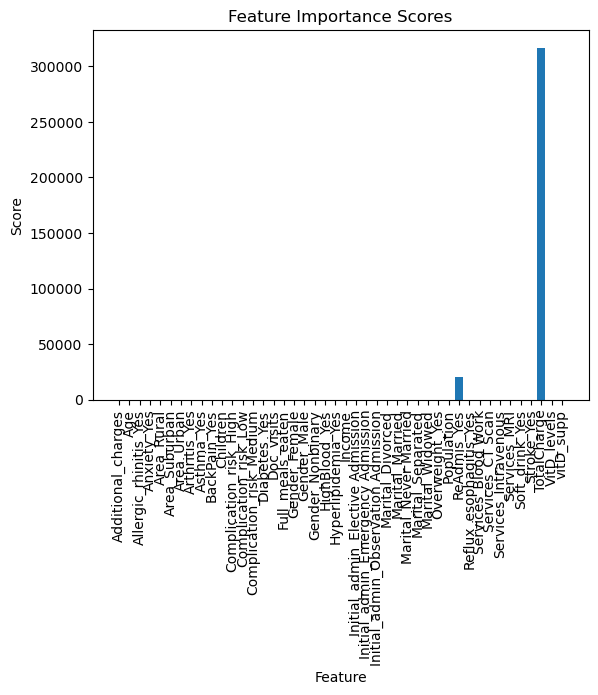

In [141]:
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_train, y_train)
feature_scores = selector.scores_
print(feature_scores)

features = range(X_train.shape[1])
plt.bar(features, selector.scores_)
plt.xticks(features, X_train.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importance Scores')
plt.show()



#### Prediction Code



In [142]:
gbr = GradientBoostingRegressor(random_state=10)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Mean Squared Error:  1.190410586421734
Root Mean Squared Error:  1.091059387211225


In [143]:
print(gbr.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [144]:
params = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

grid_gbr = GridSearchCV(estimator=gbr, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 300]},
             scoring='neg_mean_squared_error')

In [145]:
best_hyperparams = grid_gbr.best_params_
best_cv_mse = grid_gbr.best_score_*-1
print('Best Hyperparameters: \n', best_hyperparams)
print('Best CV MSE: \n', best_cv_mse)

Best Hyperparameters: 
 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best CV MSE: 
 0.11944504098534403


In [146]:
best_model = grid_gbr.best_estimator_
y_pred = best_model.predict(X_test)

mse = MSE(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

print('Test Data MSE: \n', mse)
print('Test Data R2: \n', r2)

Test Data MSE: 
 0.10924835580902724
Test Data R2: 
 0.9998431107772681


### D2: Prediction Analysis: Discussion


#### Analysis Technique

    - Feature Selection: The initial feature selection occurs in the data preparation phase, and the SelectKBest method identifies the most relevant features for the model. Removing less relevant features is crucial for reducing dimensionality and improving model performance. In this case, although there were varying degrees of feature relevance, no additional features were removed from the model from these calculations.

    - Model Selection: The Gradient Boosting Regressor (GradientBoostingRegressor) model was chosen because it can handle complex, non-linear relationships in the data.

    - Hyperparameter Tuning: Using GridSearchCV to find the best combination of learning_rate, max_depth, and n_estimators. This process involved:

        - Defining a parameter grid with ranges for learning_rate, max_depth, and n_estimators.
        - Fitting GridSearchCV to the training data and evaluating models using cross-validation.
        - Selecting the best parameters based on the lowest mean squared error (MSE).

#### Model Evaluation:

    - Calculated Mean Squared Error (MSE) and R^2 on the test dataset to assess model performance.
    - Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
    - Best CV MSE: 0.11944504098534403
    - Test Data MSE: 0.10924835580902724
    - Test Data R^2: 0.9998431107772681

- Intermediate Calculations:

    - I do not perform intermediate calculations manually and use built-in functions from libraries like scikit-learn for model performance metrics. I specifically use the following library and function: 
    
        - from sklearn.metrics import mean_squared_error as MSE

    
### D3: Prediction Analysis: Code

#### See the code above under 'Prediction Code.'



## Part 5: Data Summary and Implications

### E1: Accuracy and Mean Squared Error

#### Accuracy
    
    - R2: 0.9998431107772681
        
        - In regression, model accuracy is commonly expressed with the R-squared value. R-squared measures the amount of variance predicted by the independent variables in the dependent variable. The normal range is 0 to 1. Values closer to 1 than 0 indicate better performance.
           
        - This Gradient Boost Regression model has a very high R2 value, indicating that it accounts for a high degree of variance in its prediction.
           
#### Mean Squared Error


    - MSE: 0.10924835580902724
    
        - Mean square error measures the average of the errors squared. Mean squared error is the average difference (squared) between the actual and predicted values. Mean squared error in the context of the average prediction value is a valuable performance metric. A mean squared error of 1 could be high when predicting human height in feet, whereas a mean squared error of an even bigger ten could be low when predicting moon distance to Earth in feet.
        
        - This Gradient Boost Regression model has a very low mean squared value, indicating a very low prediction error and a better fit.

    
### E2: Results and Implications


#### Results

    - High R-squared value indicating good 'accuracy' for the model.
    
    - Low mean squared error indicating a good fit for the model.
    
#### Implications

    - The metrics evaluated for the model's predictions significantly affect how this model can be practically applied.
    
    - Our analysis suggests that this model should be implemented in a healthcare setting to predict a hospital patient's initial stay.
    
    - Although this model may be effective under this data set, continuous monitoring and tuning may be needed to maintain model performance.


### E3: Limitations

    - Although accounted for as best as possible in this analysis, overfitting is a possible limitation. 
    
    - We used cross-validation and verified our model's performance on unseen test data. 
    
    - The CV MSE and the Test MSE being almost identical indicate that there is currently no overfitting problem. The high R2 and low Test MSE indicate that the model is well-fitting and has low bias.
    
    - Although overfitting is currently accounted for, the model does have a very high R-squared value and low MSE value, which indicates that it has learned the training data too well.
    
    - If overfitting becomes a problem, it will lead to inaccurate predictions by the model. To remedy this, continuous monitoring and validation should be performed on the model as new and different data become available.



### E4: Recommendations


- In a hospital setting, utilize this model's predictions to inform the business of possible staffing or resource requirements increases and identify patients with a higher likelihood of prolonged stays.

- This model alone only predicts an initial stay for a hospital patient. With further interventions and practical applications from this model's predictions, it will ultimately be effective at accomplishing our goals.


## Part 6: Demonstration


### G: Presentation

    - See attached Panopto Video
       
### H: Web Sources

- No web sources were used to create this analysis.

### I: Text Sources

- No text sources were used to create this analysis.